In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
 
data = pd.read_csv('data/energy_dataset.csv', parse_dates = ['time'])
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
data.time = pd.to_datetime(data.time, utc = True, infer_datetime_format= True)
data = data.set_index('time')
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
data.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [5]:
# 统计Dataframe所有列中0的个数
for column_name in data.columns:
    column = data[column_name]
    # 获取列中0的计数
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 4
generation fossil brown coal/lignite               : 10517
generation fossil coal-derived gas                 : 35046
generation fossil gas                              : 1
generation fossil hard coal                        : 3
generation fossil oil                              : 3
generation fossil oil shale                        : 35046
generation fossil peat                             : 35046
generation geothermal                              : 35046
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 12607
generation hydro run-of-river and poundage         : 3
generation hydro water reservoir                   : 3
generation marine                                  : 35045
generation nuclear                                 : 3
generation other                                   : 4
generation other renewable                         : 3
generation solar                     

In [6]:
data.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)
data.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


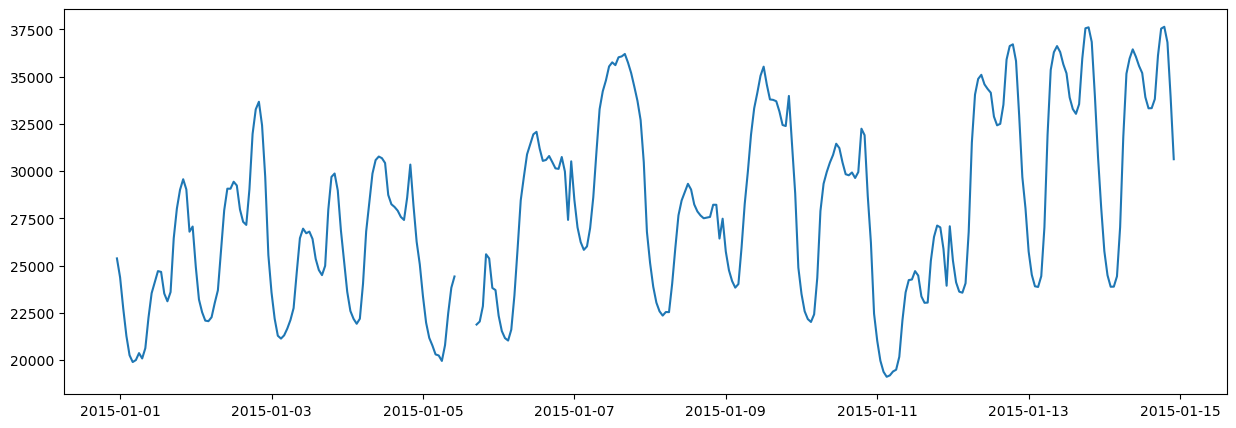

In [7]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(data['total load actual'][:24*7*2])
plt.show()

In [8]:
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)
data.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [9]:
data['total generation'] = data['generation biomass'] + data['generation fossil brown coal/lignite'] + data['generation fossil gas'] + data['generation fossil hard coal'] + data['generation fossil oil'] + data['generation hydro pumped storage consumption'] + data['generation hydro run-of-river and poundage'] + data['generation hydro water reservoir'] + data['generation nuclear'] + data['generation other'] + data['generation other renewable'] + data['generation solar'] + data['generation waste'] + data['generation wind onshore']
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0


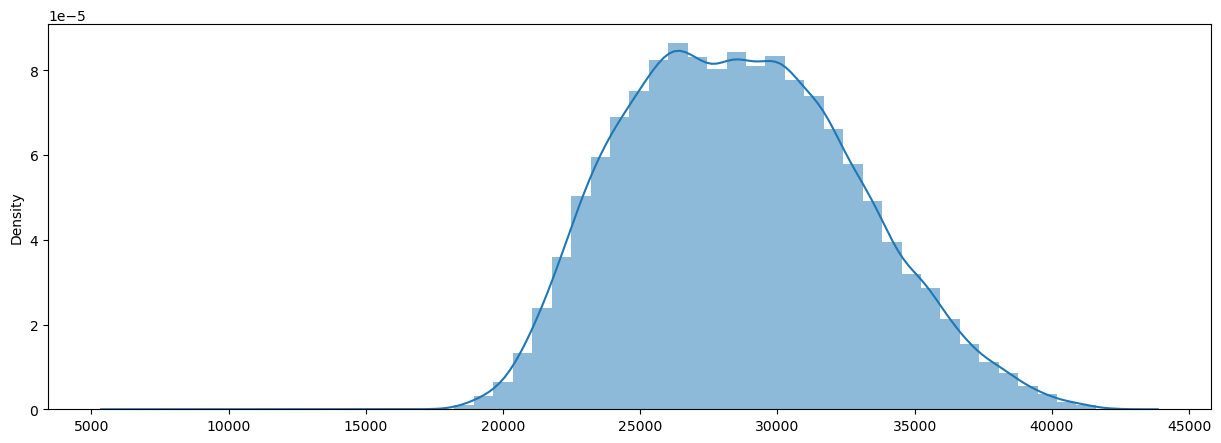

In [10]:
sns.distplot(x=data['total generation'], kde=True, hist=True, hist_kws={'alpha': 0.5})
plt.show()

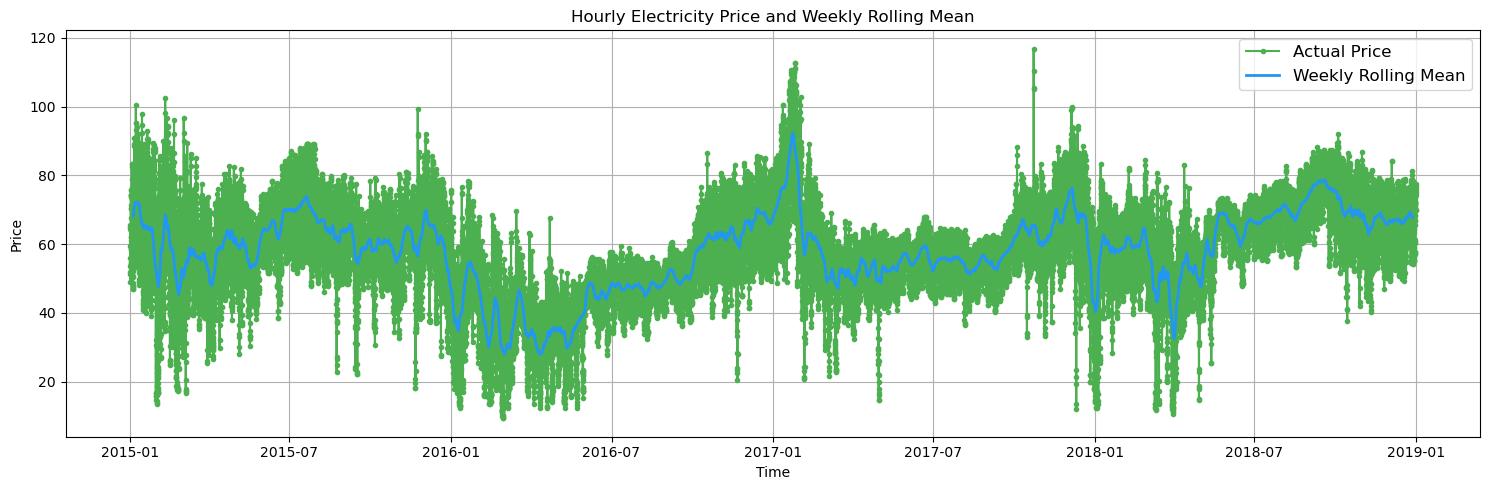

In [11]:
fig, ax = plt.subplots(1, 1)
rolling = data['price actual'].rolling(24*7, center=True).mean()
ax.plot(data['price actual'], color='#4CAF50', label='Actual Price', marker='o', markersize=3)
ax.plot(rolling, color='#2196F3', linestyle='-', linewidth=2, label='Weekly Rolling Mean')
ax.grid(True)  
plt.legend(fontsize='large')  
plt.title('Hourly Electricity Price and Weekly Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout() 
plt.show()

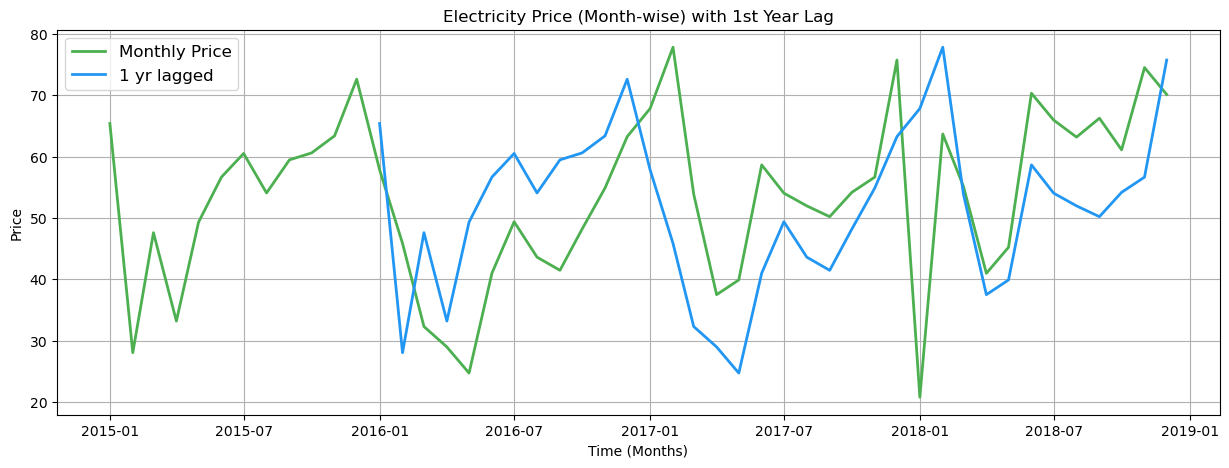

In [12]:
monthly_price = data['price actual'].asfreq('M')
lagged = monthly_price.shift(12)
fig, ax = plt.subplots(1, 1)
ax.plot(monthly_price, label='Monthly Price', color='#4CAF50', linewidth=2) 
ax.plot(lagged, label='1 yr lagged', color='#2196F3', linewidth=2)      
ax.grid(True)
plt.legend(fontsize='large')
plt.title('Electricity Price (Month-wise) with 1st Year Lag')
plt.xlabel('Time (Months)')
plt.ylabel('Price')
plt.show()

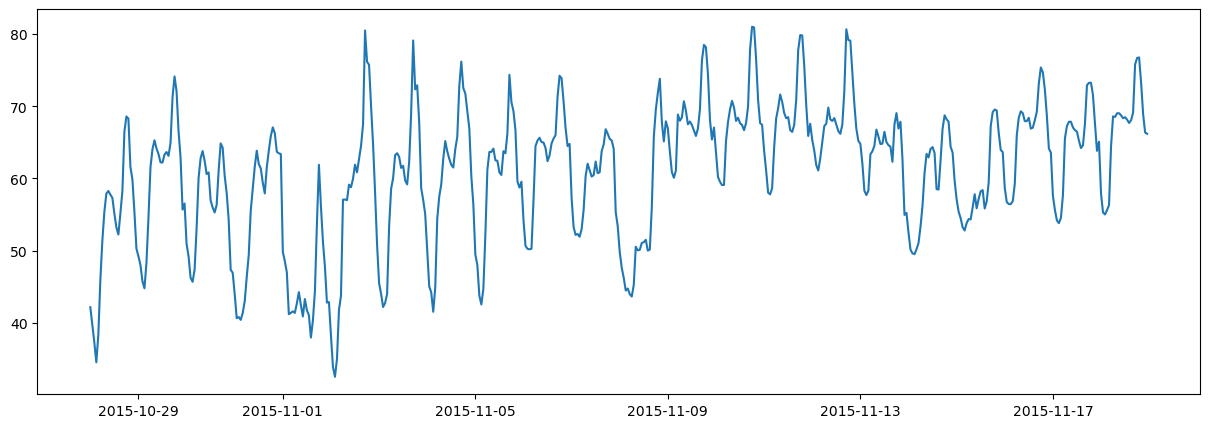

In [13]:
start = 1+ 24*300
end = 1+ 24*322
plt.plot(data['price actual'][start:end])
plt.show()

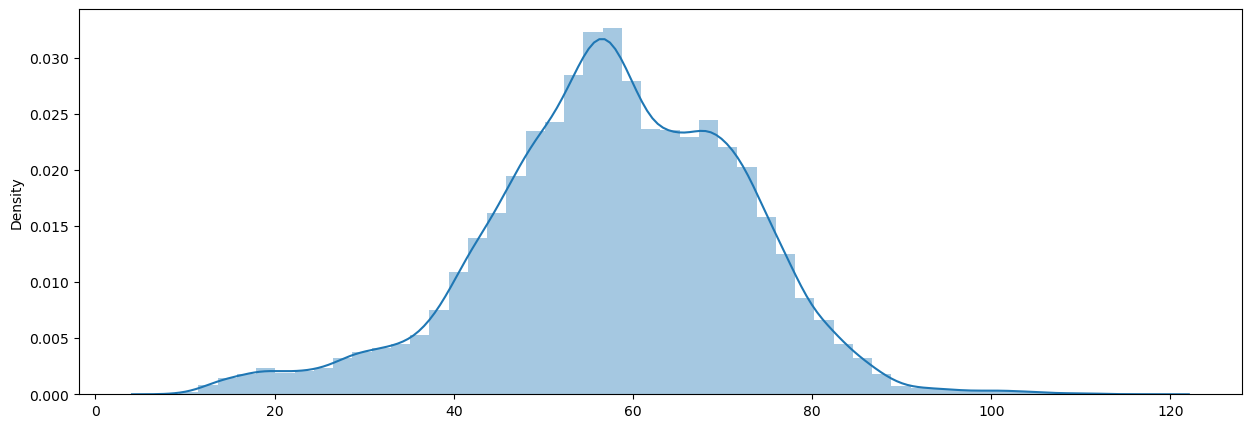

In [14]:
sns.distplot(x = data['price actual'], kde = True)
plt.show()

In [15]:
# 拆分数据集
def prepare_dataset(data, size):
  x_data = []
  y_data = []
 
  l = len(data) - size
 
  for i in range(l):
    x = data[i:i+size]
    y = data[i+size]
    x_data.append(x)
    y_data.append(y)
 
  return np.array(x_data), np.array(y_data)
 
# 为plot创建函数，我们稍后会用到它
def plot_model_rmse_and_loss(history, title):
    # 评估训练和验证的准确性和损失
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(15, 5))
 
    # 绘制训练和验证RMSE
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE', color='blue', linestyle='-')
    plt.plot(val_rmse, label='Validation RMSE', color='orange', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('Epochs vs. Training and Validation RMSE')
    plt.legend()
 
    # 绘图训练和验证损失
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss', color='green', linestyle='-')
    plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Epochs vs. Training and Validation Loss')
    plt.legend()
    plt.suptitle(title, fontweight='bold', fontsize=15)
    # 调整布局以防止元素重叠
    plt.tight_layout()
    plt.show()

In [16]:
# 标准化处理
from sklearn.preprocessing import MinMaxScaler
data_filtered = data['price actual'].values
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data_filtered.reshape(-1,1))
scaled_data.shape

(35064, 1)

In [17]:
train_size = int(np.ceil(len(scaled_data) * 0.8))
test_size = int((len(scaled_data) - train_size) *0.5)
print(train_size, test_size)

28052 3506


In [18]:
xtrain, ytrain = prepare_dataset(scaled_data[:train_size], 25)
xval, yval = prepare_dataset(scaled_data[train_size-25:train_size +test_size], 25)
xtest, ytest = prepare_dataset(scaled_data[train_size + test_size-25:], 25)
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(28027, 25, 1)
(3506, 25, 1)
(3506, 25, 1)


In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [20]:
# 第一种方法:堆叠SimpleRNN
# Create a Sequential model (a linear stack of layers)
model_SimpleRNN = Sequential()
 
# Add a SimpleRNN layer with 128 units and return sequences for the next layer
# input_shape: Shape of input data (number of timesteps, number of features)
model_SimpleRNN.add(SimpleRNN(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
 
# Add another SimpleRNN layer with 64 units and do not return sequences
model_SimpleRNN.add(SimpleRNN(64, return_sequences=False))
 
# Add a fully connected Dense layer with 64 units
model_SimpleRNN.add(Dense(64))
 
# Add a Dropout layer with dropout rate of 0.2 to prevent overfitting
model_SimpleRNN.add(Dropout(0.2))
 
# Add a fully connected Dense layer with 1 unit for regression
model_SimpleRNN.add(Dense(1))
 
# Compile the model with specified loss function, evaluation metrics, and optimizer
model_SimpleRNN.compile(loss=loss, metrics=metric, optimizer=optimizer)
 
# Train the model using training data (xtrain, ytrain) for a specified number of epochs
# Validate the model using validation data (xval, yval)
# early_stopping: A callback function to stop training if validation loss does not improve
history = model_SimpleRNN.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval), callbacks=early_stopping)

Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0313 - root_mean_squared_error: 0.1523 - val_loss: 5.0335e-04 - val_root_mean_squared_error: 0.0224
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 4.1057e-04 - val_root_mean_squared_error: 0.0203
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0381 - val_loss: 8.0813e-04 - val_root_mean_squared_error: 0.0284
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 4.2078e-04 - val_root_mean_squared_error: 0.0205
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 4.1816e-04 - val_root_mean_squared_error: 0.0204
Epoch 6/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 9.6034e-04 - root_mean_squared_error: 0.0310 - val_loss: 4.0985e-04 - val_root_mean_squared_error: 0.0202
Epoch 7/10
876/876 ━━━━━

In [21]:
# Generate predictions using the trained SimpleRNN model on the test data
predictions = model_SimpleRNN.predict(xtest)
 
# Inverse transform the scaled predictions to the original scale using the scaler
predictions = scaler.inverse_transform(predictions)
 
# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
# RMSE is a commonly used metric to measure the difference between predicted and actual values
simplernn_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
 
# Print the Root Mean Squared Error for SimpleRNN model
print(f"Root Mean Squared Error for SimpleRNN = {simplernn_rmse}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Squared Error for SimpleRNN = 70.05303465329732


In [22]:
# 第二种方法:CNN 1D
from tensorflow.keras.optimizers import Adam
 
# Create a Sequential model (a linear stack of layers)
model_CNN = Sequential()
 
# Add a 1D convolutional layer with 48 filters, kernel size of 2, 'causal' padding, and ReLU activation
# Input shape: Shape of input data (number of timesteps, number of features)
model_CNN.add(Conv1D(filters=48, kernel_size=2, padding='causal', activation='relu', input_shape=(xtrain.shape[1], 1)))
 
# Flatten the output of the convolutional layer to be fed into the Dense layers
model_CNN.add(Flatten())
 
# Add a fully connected Dense layer with 48 units and ReLU activation
model_CNN.add(Dense(48, activation='relu'))
 
# Add a Dropout layer with dropout rate of 0.2 to prevent overfitting
model_CNN.add(Dropout(0.2))
 
# Add a fully connected Dense layer with 1 unit for regression
model_CNN.add(Dense(1))
 
# Use legacy optimizer tf.keras.optimizers.legacy.Adam with default learning rate
optimizer = Adam()
 
# Compile the model with specified loss function, evaluation metrics, and optimizer
model_CNN.compile(loss=loss, metrics=metric, optimizer=optimizer)
 
# Train the model using training data (xtrain, ytrain) for a specified number of epochs
# Validate the model using validation data (xval, yval)
# early_stopping: A callback function to stop training if validation loss does not improve
history = model_CNN.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval), callbacks=early_stopping)

Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0111 - root_mean_squared_error: 0.0776 - val_loss: 5.8627e-04 - val_root_mean_squared_error: 0.0242
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 4.4395e-04 - val_root_mean_squared_error: 0.0211
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 5.1407e-04 - val_root_mean_squared_error: 0.0227
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 4.9192e-04 - val_root_mean_squared_error: 0.0222
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 4.2222e-04 - val_root_mean_squared_error: 0.0205


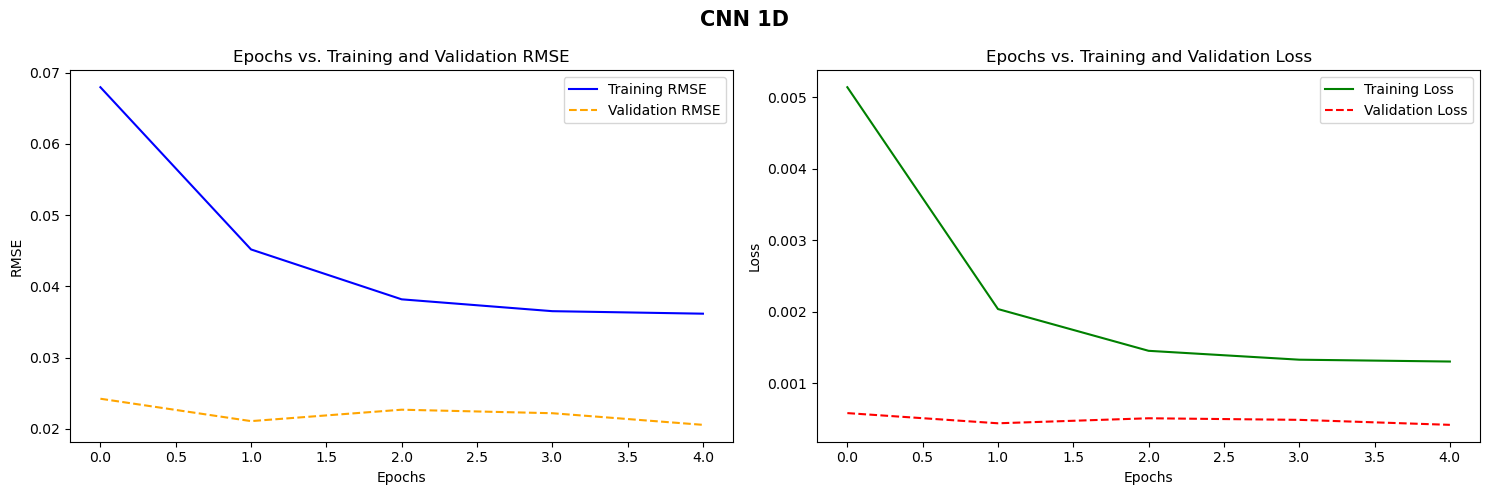

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Root Mean Squared Error for CNN 1D = 69.41960237912737


In [23]:
# Plot the RMSE and loss curves for the CNN 1D model using the training history
plot_model_rmse_and_loss(history, "CNN 1D")
 
# Generate predictions using the trained CNN 1D model on the test data
predictions = model_CNN.predict(xtest)
 
# Inverse transform the scaled predictions to the original scale using the scaler
predictions = scaler.inverse_transform(predictions)
 
# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
# RMSE is a commonly used metric to measure the difference between predicted and actual values
CNN_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
 
# Print the Root Mean Squared Error for the CNN 1D model
print(f"\nRoot Mean Squared Error for CNN 1D = {CNN_rmse}")

In [24]:
# 第三种方法:CNN-LSTM
from tensorflow.keras.optimizers import Adam
 
# Create a Sequential model for CNN-LSTM architecture
model_CNN_LSTM = Sequential()
 
# Add a 1D convolutional layer with 100 filters, kernel size of 2, 'causal' padding, and ReLU activation
# Input shape: Shape of input data (number of timesteps, number of features)
model_CNN_LSTM.add(Conv1D(filters=100, kernel_size=2, padding='causal', activation='relu', input_shape=(xtrain.shape[1], 1)))
 
# Add a Long Short-Term Memory (LSTM) layer with 100 units and return sequences
model_CNN_LSTM.add(LSTM(100, return_sequences=True))
 
# Flatten the output of the LSTM layer to be fed into the Dense layers
model_CNN_LSTM.add(Flatten())
 
# Add a fully connected Dense layer with 100 units and ReLU activation
model_CNN_LSTM.add(Dense(100, activation='relu'))
 
# Add a Dropout layer with dropout rate of 0.2 to prevent overfitting
model_CNN_LSTM.add(Dropout(0.2))
 
# Add a fully connected Dense layer with 1 unit for regression
model_CNN_LSTM.add(Dense(1))
 
# Use legacy optimizer tf.keras.optimizers.legacy.Adam with default learning rate
optimizer = Adam()
 
# Compile the model with specified loss function, evaluation metrics, and optimizer
model_CNN_LSTM.compile(loss=loss, metrics=metric, optimizer=optimizer)
 
# Train the model using training data (xtrain, ytrain) for a specified number of epochs
# Validate the model using validation data (xval, yval)
# early_stopping: A callback function to stop training if validation loss does not improve
history = model_CNN_LSTM.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval), callbacks=early_stopping)

Epoch 1/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.0070 - root_mean_squared_error: 0.0632 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 2/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 3/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 5.1130e-04 - val_root_mean_squared_error: 0.0226
Epoch 4/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 9.5440e-04 - root_mean_squared_error: 0.0309 - val_loss: 4.7186e-04 - val_root_mean_squared_error: 0.0217
Epoch 5/10
876/876 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 8.3962e-04 - root_mean_squared_error: 0.0290 - val_loss: 4.2541e-04 - val_root_mean_squared_error: 0.0206


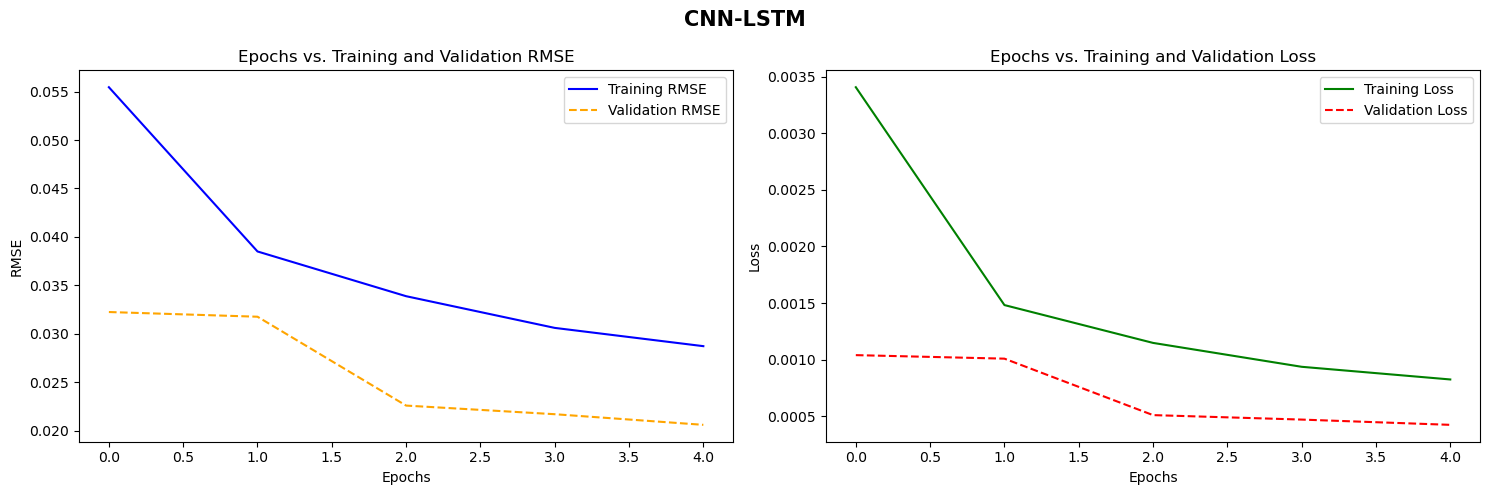

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Root Mean Squarred Error for CNN-LSTM = 70.81545275676224


In [25]:
# Plot the RMSE and loss curves for the CNN-LSTM model using the training history
plot_model_rmse_and_loss(history, "CNN-LSTM")
 
# Generate predictions using the trained CNN-LSTM model on the test data
predictions = model_CNN_LSTM.predict(xtest)
 
# Inverse transform the scaled predictions to the original scale using the scaler
predictions = scaler.inverse_transform(predictions)
 
# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
# RMSE is a commonly used metric to measure the difference between predicted and actual values
CNN_LSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squarred Error for CNN-LSTM = {CNN_LSTM_rmse}")

In [26]:
# Print the Root Mean Squared Error for SimpleRNN model
print(f"Root Mean Squared Error for SimpleRNN = {simplernn_rmse}")
 
# Print the Root Mean Squared Error for CNN 1D model
print(f"Root Mean Squared Error for CNN 1D = {CNN_rmse}")
 
# Print the Root Mean Squared Error for CNN-LSTM model
print(f"Root Mean Squared Error for CNN-LSTM = {CNN_LSTM_rmse}")

Root Mean Squared Error for SimpleRNN = 70.05303465329732
Root Mean Squared Error for CNN 1D = 69.41960237912737
Root Mean Squared Error for CNN-LSTM = 70.81545275676224
